# **ESERCIZI LEZIONE 4**

### ***1. LA LEGGE DEI GRANDI NUMERI***

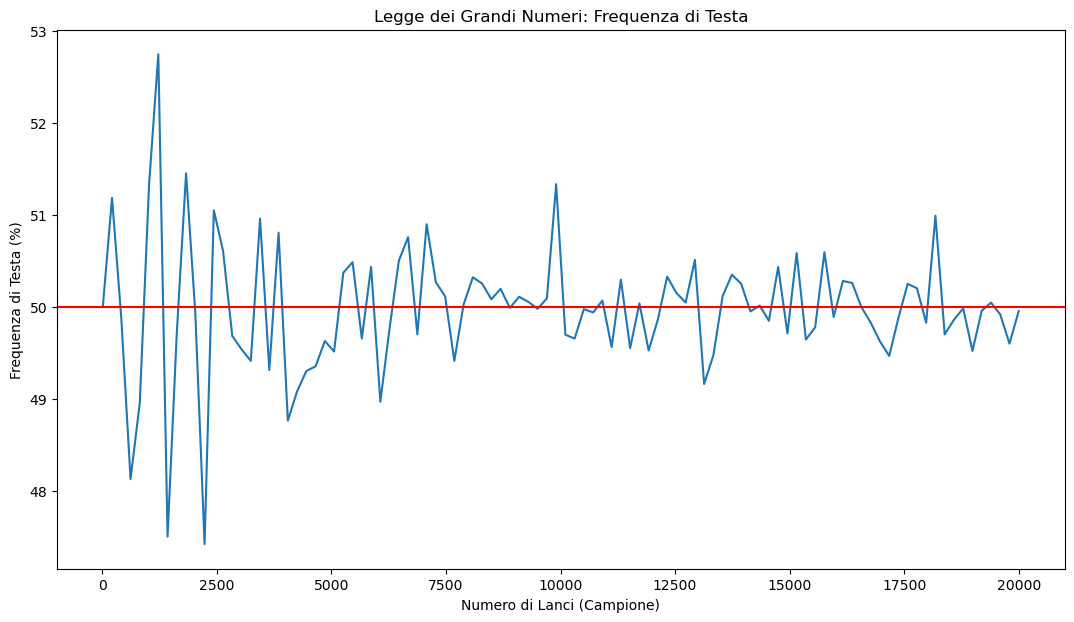

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def frequenza_testa(N):
    lanci = np.random.choice(['Testa', 'Croce'], size=N)
    num_teste = np.sum(lanci == 'Testa')
    frequenza_percentuale = (num_teste / N) * 100
    return frequenza_percentuale

campioni = np.linspace(10, 20000, 100, dtype=int)

frequenze_teste = [float(frequenza_testa(N)) for N in campioni]

plt.figure(figsize=(13, 7))
plt.plot(campioni, frequenze_teste, label='Frequenza di Testa')
plt.title("Legge dei Grandi Numeri: Frequenza di Testa")
plt.xlabel("Numero di Lanci (Campione)")
plt.ylabel("Frequenza di Testa (%)")
plt.axhline(y=50, color='red', linestyle='-')
plt.show()


### ***2. ANALISI DEL DATASET DEL TITANIC***

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

print("Righe, Colonne:", df.shape)

print("\nValori mancanti per colonna:")
print(df.isnull().sum())

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked)

df = df.dropna(subset=['Age'])

duplicati = df.duplicated().sum()
print("\nNumero di righe duplicate:", duplicati)

def riempi_eta_mancanti(gruppo):
    media = gruppo.mean()
    return gruppo.fillna(media)

df['Age'] = df.groupby('Pclass')['Age'].transform(riempi_eta_mancanti)
print(df["Age"])

Righe, Colonne: (891, 12)

Valori mancanti per colonna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Numero di righe duplicate: 0
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64


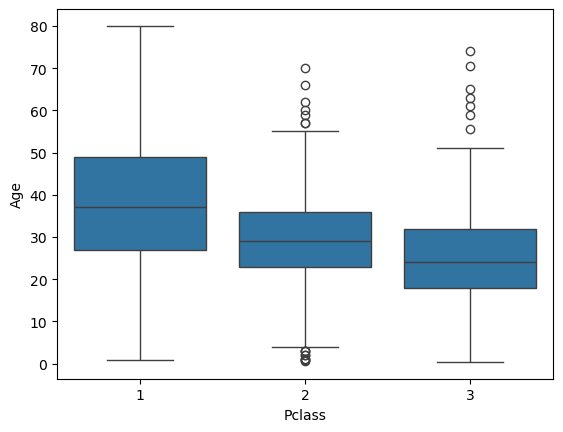

In [17]:
sns.boxplot(data=df, x="Pclass", y="Age")
plt.show()

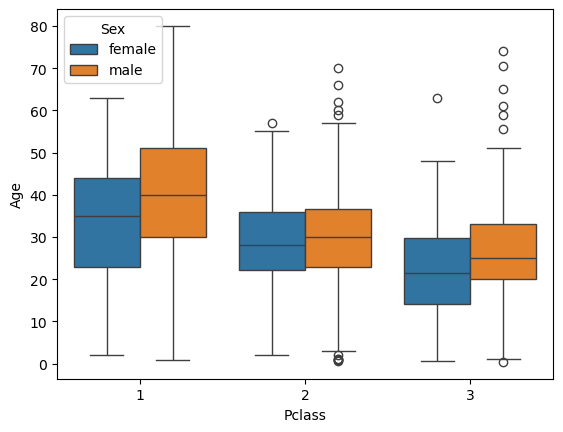

In [18]:
#distinguendo per sesso
sns.boxplot(data=df, x="Pclass", y="Age", hue="Sex")
plt.show()

### ***3. ANALISI DEL DATASET IRIS***

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
print(df['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [21]:
mean_petals = df.groupby('species')[['petal_length', 'petal_width']].mean()
print(mean_petals)

            petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


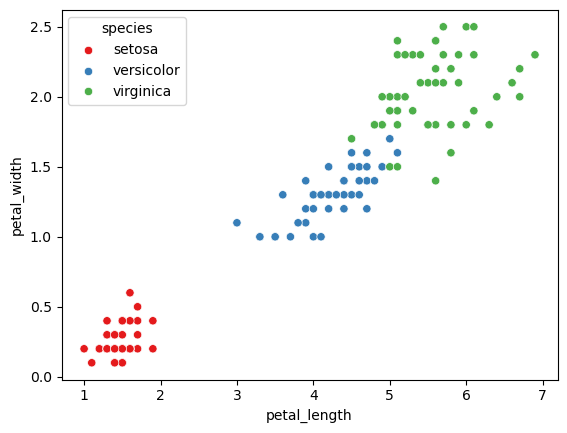

In [22]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette='Set1')
plt.show()

In [23]:
df['petal_area'] = df['petal_length'] * df['petal_width']
print(df.groupby('species')['petal_area'].describe())

            count     mean       std   min     25%     50%    75%    max
species                                                                 
setosa       50.0   0.3656  0.181155  0.11  0.2800   0.300   0.42   0.96
versicolor   50.0   5.7204  1.368403  3.30  4.8600   5.615   6.75   8.64
virginica    50.0  11.2962  2.157412  7.50  9.7175  11.445  12.79  15.87


C:\Users\barel\AppData\Local\Temp\ipykernel_15304\945352219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y='petal_area', palette='Set2')


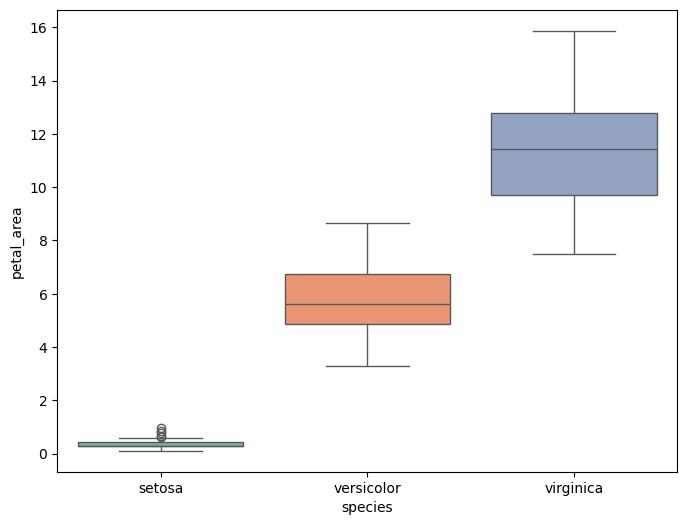

In [ ]:
sns.boxplot(data=df, x='species', y='petal_area', palette='Set2')
plt.show()